<a href="https://colab.research.google.com/github/Tsuma532/AmTesting/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: This program classifies Images


In [87]:
pip install keras

In [0]:
#Load the data
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test)=cifar10.load_data()

In [89]:
#print the data types
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test)) 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [90]:
#Get the Shapes
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [91]:
#Take a look at the first image
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

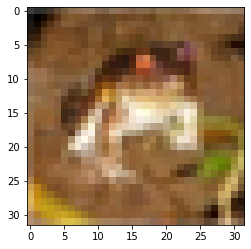

In [92]:
#Show image as a picture
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [93]:
#Print the label of the image
print('The label is:', y_train[0])

The label is: [6]


In [94]:
#One-hot encoding: Convert the labels into a set of 10 numbers into the neural network we gonna create
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [99]:
#Print an example of the new labels 
print('The one hot label is:', y_train_one_hot[0])


The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#Normalize the pixels and the images to be values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [0]:
#Building the CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#Create the architecture
model = Sequential()

#Convolution Layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

#MaxPooling Layer
model.add( MaxPooling2D(pool_size=(2,2)))

#Convolution Layer
model.add( Conv2D(32, (5,5), activation='relu') )

#MaxPooling Layer
model.add( MaxPooling2D(pool_size=(2,2)))

#Flattening Layer
model.add( Flatten() )

model.add( Dense(1000, activation='relu'))
model.add( Dense(10, activation='softmax'))

In [0]:
#Compli the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
#Train The Model
hist = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 49s 1ms/step - loss: 2.3028 - acc: 0.0992 - val_loss: 2.3026 - val_acc: 0.0984
Epoch 2/10
35000/35000 [==============================] - 47s 1ms/step - loss: 2.3027 - acc: 0.0989 - val_loss: 2.3027 - val_acc: 0.0984
Epoch 3/10
35000/35000 [==============================] - 48s 1ms/step - loss: 2.3026 - acc: 0.0983 - val_loss: 2.3027 - val_acc: 0.0983
Epoch 4/10
35000/35000 [==============================] - 48s 1ms/step - loss: 2.3026 - acc: 0.0973 - val_loss: 2.3027 - val_acc: 0.0979
Epoch 5/10
35000/35000 [==============================] - 48s 1ms/step - loss: 2.3027 - acc: 0.0957 - val_loss: 2.3027 - val_acc: 0.0984
Epoch 6/10
35000/35000 [==============================] - 48s 1ms/step - loss: 2.3026 - acc: 0.0996 - val_loss: 2.3027 - val_acc: 0.0979
Epoch 7/10
35000/35000 [==

In [110]:
#Get the model accuracy
model.evaluate(x_test, y_test_one_hot)[1]


10000/10000 [==============================] - 4s 447us/step


0.1

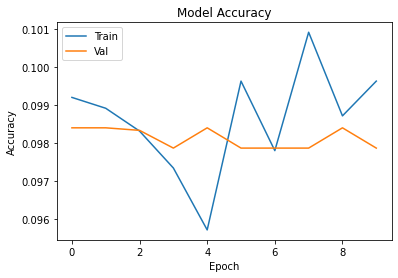

In [111]:
#Visualize the accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

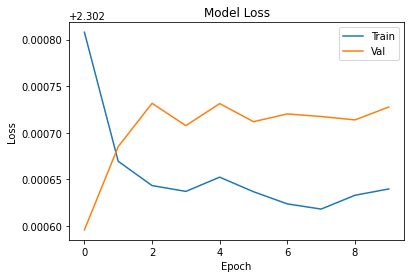

In [112]:
#Visualize the Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [125]:
#Load the data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('T0001.1.1.D.2012-10-08.00.jpg')

Saving T0001.1.1.D.2012-10-08.00.jpg to T0001.1.1.D.2012-10-08.00 (1).jpg


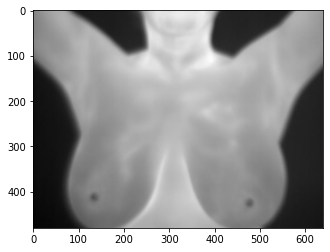

In [126]:
#Show the uploaded Image
img = plt.imshow(my_image)

In [0]:
#Resize the image
from skimage.transform import resize


In [0]:
my_image_resized = resize(my_image,(32,32,3))

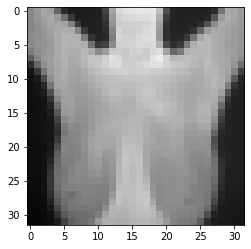

In [132]:
img = plt.imshow(my_image_resized)

In [133]:
#Get the probabilities of each class
import numpy as np
probabilities = model.predict( np.array( [my_image_resized, ]))

#print the probablities
probabilities

array([[0.06764378, 0.1304638 , 0.14185269, 0.09931813, 0.06857942,
        0.10758015, 0.09184138, 0.0948123 , 0.10036676, 0.09754157]],
      dtype=float32)

In [135]:
#Number 2 class
number_to_class = ['airplane', 'automobile',  'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print('Most Likely Class:', number_to_class[index[9]], '--probability:', probabilities[0, index[9]])
print('Second Most Likely Class:', number_to_class[index[9]], '--probability:', probabilities[0, index[8]])
print('Third Most Likely Class:', number_to_class[index[9]], '--probability:', probabilities[0, index[7]])
print('Fourth Most Likely Class:', number_to_class[index[9]], '--probability:', probabilities[0, index[6]])
print('Fifth Most Likely Class:', number_to_class[index[9]], '--probability:', probabilities[0, index[5]])


Most Likely Class: bird --probability: 0.14185269
Second Most Likely Class: bird --probability: 0.1304638
Third Most Likely Class: bird --probability: 0.10758015
Fourth Most Likely Class: bird --probability: 0.10036676
Fifth Most Likely Class: bird --probability: 0.09931813


In [0]:
#Save the model
model.save('my_model.h5')

In [0]:

#Load the model
from keras.models import load_model
model = load_model('my_model.h5')